In [15]:
# loading essential libraries first
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [16]:
df = pd.read_csv("Covid_AMI_Data_Merged.csv")

In [17]:
ml_alg = df.copy()
ml_alg.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
0,0,2017,Alabama,1,712000,0,0
1,1,2017,Alaska,2,94000,0,0
2,2,2017,Arizona,4,920000,0,0
3,3,2017,Arkansas,5,441000,0,0
4,4,2017,California,6,5241000,0,0


In [18]:
ml_alg.drop(['Unnamed: 0'], axis = 1, inplace = True)
ml_alg.dtypes

Year                      int64
State                    object
FIPS                      int64
18_or_Older_AMI_Total     int64
Tot_Cases                 int64
Toth_Deaths               int64
dtype: object

In [54]:
corr = ml_alg.corr()
corr

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
Year,1.000000e+00,-8.065457e-14,0.044158,0.522731,0.520657
FIPS,-8.065457e-14,1.000000e+00,-0.042495,-0.047480,-0.054190
18_or_Older_AMI_Total,4.415795e-02,-4.249504e-02,1.000000,0.493761,0.480366
Tot_Cases,5.227306e-01,-4.747970e-02,0.493761,1.000000,0.984044
Toth_Deaths,5.206568e-01,-5.418987e-02,0.480366,0.984044,1.000000


<AxesSubplot:>

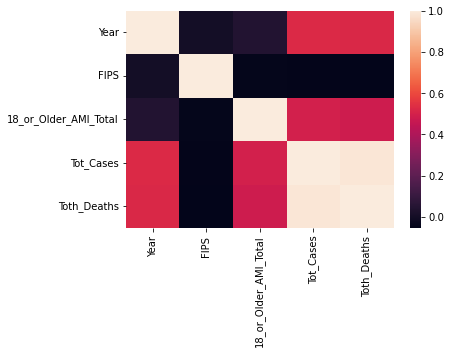

In [55]:
sns.heatmap(corr)

In [61]:
covid_ami = ml_alg[['18_or_Older_AMI_Total', 'Tot_Cases']].copy()
covid_ami.corr()

,18_or_Older_AMI_Total,Tot_Cases
18_or_Older_AMI_Total,1.000000,0.493761
Tot_Cases,0.493761,1.000000


In [30]:
# select features 
X = ml_alg.drop(['18_or_Older_AMI_Total', 'State'], axis = 1)
y = ml_alg[["18_or_Older_AMI_Total"]]

In [62]:
X.shape

(255, 4)

In [63]:
y.shape

(255, 1)

In [64]:
X_train = X[:175].values
X_test = X[175:].values
y_train = y[:175].values
y_test = y[175:].values

In [65]:
X_test

array([[   2020,      26,  589728,   13816],
       [   2020,      27,  415302,    5382],
       [   2020,      28,  221928,    5646],
       [   2020,      29,  449569,    6856],
       [   2020,      30,   81555,     961],
       [   2020,      31,  167233,    1651],
       [   2020,      32,  224731,    3125],
       [   2020,      33,   44028,     758],
       [   2020,      34,  527784,   19042],
       [   2020,      35,  142864,    2385],
       [   2020,      36,  548154,   12566],
       [   2020,      37,  547683,    7925],
       [   2020,      38,   92770,    1309],
       [   2020,      39,  700380,    8962],
       [   2020,      40,  325524,    4564],
       [   2020,      41,  113909,    1477],
       [   2020,      42,  648569,   15978],
       [   2020,      44,   85399,    1778],
       [   2020,      45,  317430,    5306],
       [   2020,      46,   99164,    1488],
       [   2020,      47,  576157,    6810],
       [   2020,      48, 1756172,   31282],
       [  

In [66]:
y_test

array([[1469000],
       [ 819000],
       [ 431000],
       [ 993000],
       [ 163000],
       [ 257000],
       [ 474000],
       [ 221000],
       [1112000],
       [ 300000],
       [2802000],
       [1469000],
       [ 108000],
       [1906000],
       [ 592000],
       [ 731000],
       [1814000],
       [ 178000],
       [ 706000],
       [ 112000],
       [ 937000],
       [3347000],
       [ 550000],
       [ 104000],
       [1115000],
       [1269000],
       [ 337000],
       [ 859000],
       [  88000],
       [ 794000],
       [ 113000],
       [1099000],
       [ 460000],
       [5864000],
       [1014000],
       [ 531000],
       [ 157000],
       [ 129000],
       [2903000],
       [1406000],
       [ 187000],
       [ 311000],
       [1858000],
       [1129000],
       [ 473000],
       [ 442000],
       [ 762000],
       [ 734000],
       [ 238000],
       [ 810000],
       [1157000],
       [1571000],
       [ 876000],
       [ 446000],
       [1056000],
       [ 1

In [67]:
# create a Linear Regression model object
regression_model_df2 = LinearRegression()

In [68]:
X_test

array([[   2020,      26,  589728,   13816],
       [   2020,      27,  415302,    5382],
       [   2020,      28,  221928,    5646],
       [   2020,      29,  449569,    6856],
       [   2020,      30,   81555,     961],
       [   2020,      31,  167233,    1651],
       [   2020,      32,  224731,    3125],
       [   2020,      33,   44028,     758],
       [   2020,      34,  527784,   19042],
       [   2020,      35,  142864,    2385],
       [   2020,      36,  548154,   12566],
       [   2020,      37,  547683,    7925],
       [   2020,      38,   92770,    1309],
       [   2020,      39,  700380,    8962],
       [   2020,      40,  325524,    4564],
       [   2020,      41,  113909,    1477],
       [   2020,      42,  648569,   15978],
       [   2020,      44,   85399,    1778],
       [   2020,      45,  317430,    5306],
       [   2020,      46,   99164,    1488],
       [   2020,      47,  576157,    6810],
       [   2020,      48, 1756172,   31282],
       [  

In [69]:
# pass through the X_train & y_train data set
regression_model_df2.fit(X_train, y_train)

LinearRegression()

In [70]:
# Grab the coefficient of our model and the intercept
intercept = regression_model_df2.intercept_[0]
coefficent = regression_model_df2.coef_[0][0]
intercept
coefficent

-106159.47223192267

In [71]:
# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model_df2.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The Coefficient for Year is -1.1e+05
The Coefficient for FIPS is 1.7e+03
The Coefficient for Tot_Cases is 3.1
The Coefficient for Toth_Deaths is -9.3e+01


In [72]:
# Get multiple predictions
y_predict = regression_model_df2.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[1158960.13813573],
       [1400106.94094646],
       [ 775498.40942949],
       [1373428.42889798],
       [ 776584.06009257]])

In [73]:
regression_model_df2.score(X_train, y_train)

0.15978263773653623

In [74]:

r2_score_df2 = r2_score(y_test, y_predict)
r2_score_df2

-1.0502311301828575

## Multiple Linear Regression

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [90]:
model = LinearRegression()

In [91]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model.fit(X_train, y_train)
# YOUR CODE HERE
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3246528353576428
Testing Score: 0.24583369740837246


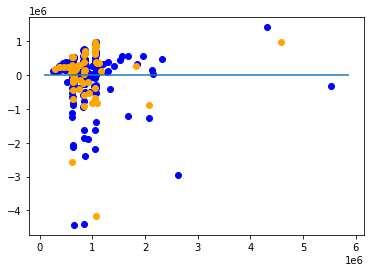

In [92]:
# Plot the residuals for the training and testing data.

# YOUR CODE HERE
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c = "b")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c = "orange")
plt.hlines(y = 0, xmin = y.min(), xmax = y.max())